In [1]:
import numpy as np
from statistics import mean
from math import exp, pi, atan
import matplotlib.pyplot as plt
from KERNEL import est_kernel
from TV_REG import tv_regularize
from GCV import run_gcv


def diff(sig, s):
    d = np.zeros(s)
    for i in range(s):
        if i == 0 or i == s-1:
            d[i] = 0
        else:
            d[i] = (sig[i+1] - sig[i-1]) / 2.
    return d


def norm(sig):
    s = sum(sig)
    n = [i / s for i in sig]
    return n


def logistic(L, k, x0, length):
    y = []
    for x in range(length):
        v = L / (1 + exp(-k*(x-x0)))
        y.append(v)
    return y


# Divide the index of desired err value to find l value.
def fit_l(sig, k):
    le = len(sig)
    x0 = le // 2
    err = []
    for i in range(100):
        log = logistic(i/100, k, x0, le)
        val = mean(abs(x - y) for x, y in zip(sig, log))
        err.append(val)
    return err


# Divide the index of desired err value to find k value.
def fit_k(sig, l):
    le = len(sig)
    x0 = le // 2
    err = []
    for i in range(100):
        log = logistic(l, i/100, x0, le)
        val = mean(abs(x - y) for x, y in zip(sig, log))
        err.append(val)
    return err


# Define arctan
def arctan(le, x0, a):
    y = []
    ipi = 1./pi
    for x in range(le):
        v = ipi * atan(a * (x-x0)) + 0.5
        y.append(v)
    return y

# Fit arctan
def fit_a(sig):
    le = len(sig)
    x0 = le // 2
    err = []
    for i in range(1000):
        at = arctan(le, x0, i/1000)
        val = mean(abs(x - y) for x, y in zip(sig, at))
        err.append(val)
    return err

In [0]:
# Open PPM and convert to a list
with open(r"C:\Users\TJ\DataspellProjects\TV_Implementation\sample.pgm", 'rb') as pgmf:
    im = plt.imread(pgmf)

sig = []
for i in im[0]:
    sig.append(i)

In [41]:
x = []
for i in range(512):
    if i < 256:
        x.append(0.)
    else:
        x.append(1.)
x = np.asarray(x).reshape(len(x), 1)
from BLUR import blur
from KERNEL import kernel
A = kernel(x.shape[0], 10)
b = list(blur(x, A, True, 0.012))

sig = []
for i in b:
    sig.append(float(i))

#sig = sig[156:356]

In [38]:
# Normalize List
mi = min(sig)
for i in range(len(sig)):
    sig[i] = (sig[i]-mi)
ma = max(sig)
for i in range(len(sig)):
    sig[i] = sig[i]/ma

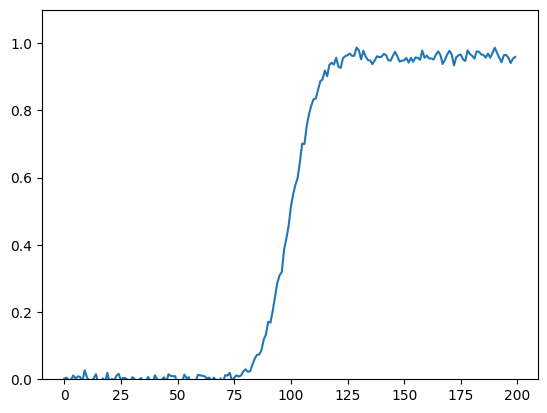

In [43]:
k = sig[156:356]
plt.plot(k)
plt.ylim([0, 1.1])
plt.show()

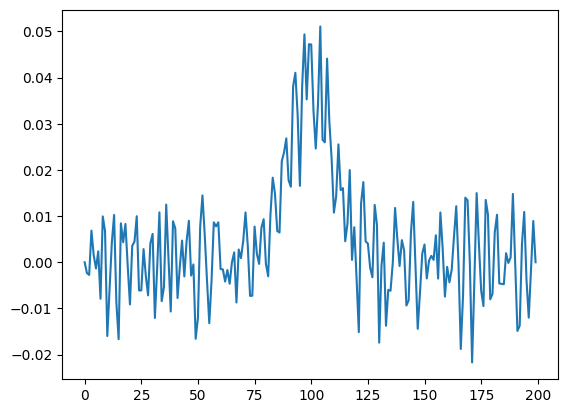

In [44]:
s = len(k)
dk = diff(k, s)
plt.plot(dk)
plt.show()

In [45]:
x0 = len(k) // 2

in1 = 100
in2 = 100
for i in range(10):
    err1 = fit_k(k, in2/100)
    in1 = min(enumerate(err1), key=lambda a: a[1])[0]
    err2 = fit_l(k, in1/100)
    in2 = min(enumerate(err2), key=lambda a: a[1])[0]

In [46]:
lo = logistic(in2/100, in1/100, x0, s)
dlo = diff(lo, s)
ndlo = norm(dlo)

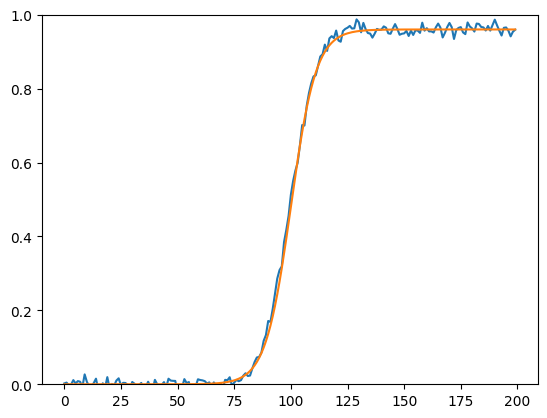

In [47]:
plt.plot(k)
plt.plot(lo)
plt.ylim([0, 1])
plt.show()

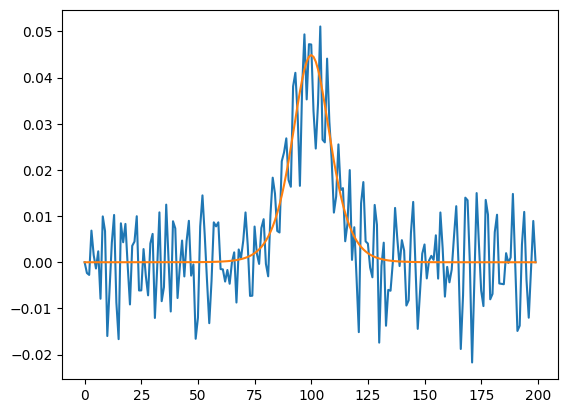

In [48]:
plt.plot(dk)
plt.plot(ndlo)
plt.show()

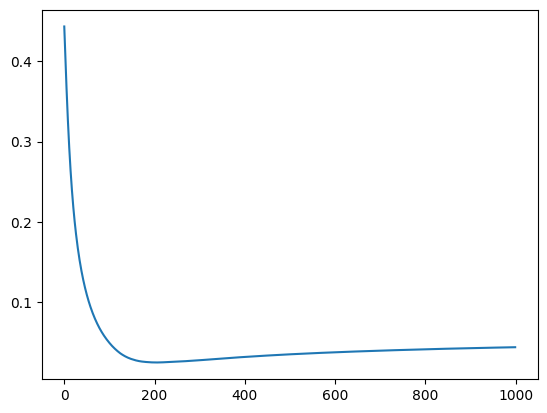

In [49]:
err3 = fit_a(k)
in3 = min(enumerate(err3), key=lambda a: a[1])[0]
ata = arctan(len(k), x0, in3/1000)
data = diff(ata, s)
ndata = norm(data)

plt.plot(err3)
plt.show()

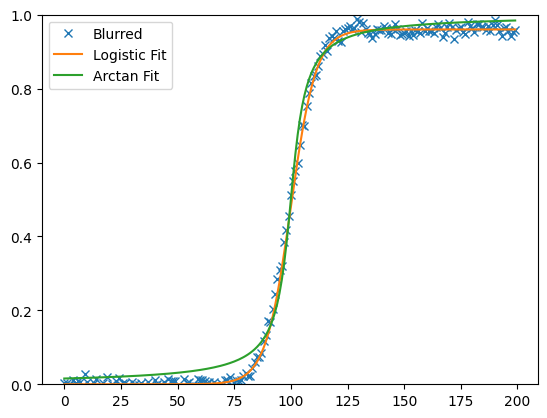

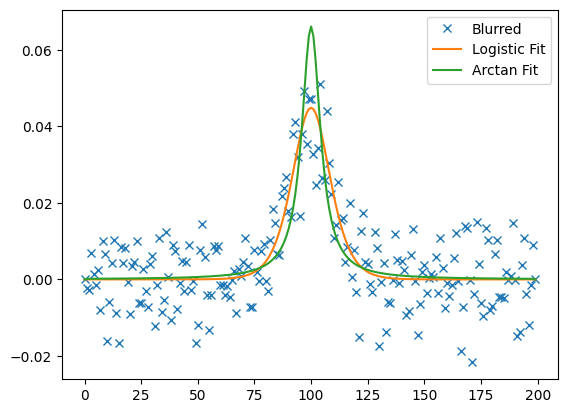

In [52]:
plt.plot(k, 'x')
plt.plot(lo)
plt.plot(ata)
plt.ylim([0, 1])
plt.legend(["Blurred", "Logistic Fit", "Arctan Fit"])
plt.show()

plt.plot(dk, 'x')
plt.plot(ndlo)
plt.plot(ndata)
plt.legend(["Blurred", "Logistic Fit", "Arctan Fit"])
plt.show()

In [11]:
A = est_kernel(s, ndlo[217:len(ndlo)])
x, gcv = run_gcv(A, np.array(k).reshape((s,1)), tv_regularize)

KeyboardInterrupt: 

In [ ]:
plt.plot(k)
plt.plot(x)
plt.ylim([0, 1])
plt.legend(["Blurry Input", "Deblurred"])
plt.show()
